# **Handwritten Character Classification using Convolutional Neural Network(CNN)**

**Importing the Required Libraries**

In [19]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
# Loading data from CSV file
X = pd.read_csv('emnist-letters.csv')
y = X['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Preprocessing and Visualizing the Training Data**

-------------------------
SAMPLE OF TRAINING DATA
-------------------------


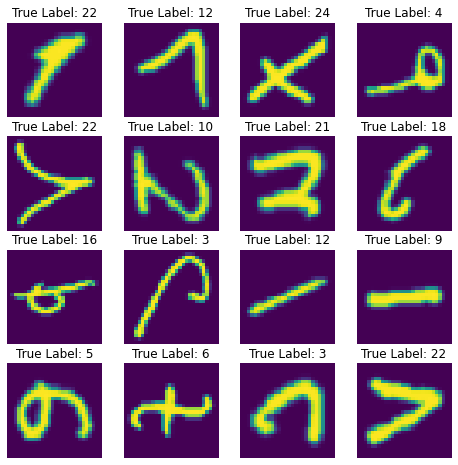

In [21]:
# Storing the labels in a separate vector y_train
y_train = np.array(X_train['label'])

# Dropping the labels column 
X_train = X_train.drop(['label'], axis=1)

# Normalizing the values of the pixels
X_train = X_train / 255

# Converting X_train dataframe to numpy array
X_train = np.array(X_train)

print("-------------------------")
print("SAMPLE OF TRAINING DATA")
print("-------------------------")

# Plotting the data
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   # Get a random image to show
    plt.title('True Label: '+str(y_train[r])) # Show its label as title
    plt.imshow(X_train[r].reshape(28,28))    # Plotting the image
plt.show()

# Converting the labels vector into one hot encoded form
oh = np.zeros((y_train.size, y_train.max()+1))
oh[np.arange(y_train.size), y_train] = 1
y_train = np.array(oh)

# Reshaping X_train to the format of the network
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')


**Preprocessing and Visualizing the Testing Data**

-------------------------
SAMPLE OF TESTING DATA
-------------------------


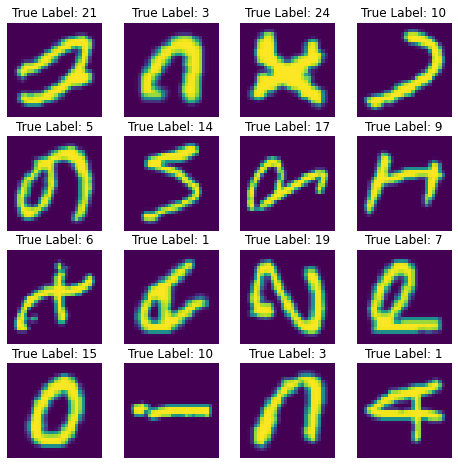

In [22]:
# Storing the labels in a separate vector y_train
y_test = np.array(X_test['label'])

# Dropping the labels column 
X_test = X_test.drop(['label'], axis=1)

# Normalizing the values of the pixels
X_test = X_test/ 255

# Converting X_train dataframe to numpy array
X_test = np.array(X_test)

print("-------------------------")
print("SAMPLE OF TESTING DATA")
print("-------------------------")

# Plotting the data
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_test.shape[0])   # Get a random image to show
    plt.title('True Label: '+str(y_test[r])) # Show its label as title
    plt.imshow(X_test[r].reshape(28,28))    # Plotting the image
plt.show()

# Converting the labels vector into one hot encoded form
oh = np.zeros((y_test.size, y_test.max()+1))
oh[np.arange(y_test.size), y_test] = 1
y_test = np.array(oh)

# Reshaping X_train to the format of the network
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


**Defining the Number of Classes** 

In [23]:
no_of_label_classes = y_train.shape[1]

**Designing the Convolutional Neural Network**

In [24]:
def create_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(no_of_label_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

**Initializing the Hyperparameters**

In [27]:
iterations = 30
b_size = 20

**Training the Model**

In [28]:
# Creating the model
model = create_model()
# Fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=iterations, batch_size=b_size, verbose=2)

Epoch 1/30
235/235 - 4s - loss: 1.5554 - accuracy: 0.5529 - val_loss: 1.0177 - val_accuracy: 0.6900
Epoch 2/30
235/235 - 4s - loss: 0.7240 - accuracy: 0.7797 - val_loss: 0.7632 - val_accuracy: 0.7550
Epoch 3/30
235/235 - 4s - loss: 0.4874 - accuracy: 0.8477 - val_loss: 0.6690 - val_accuracy: 0.7840
Epoch 4/30
235/235 - 4s - loss: 0.3619 - accuracy: 0.8865 - val_loss: 0.6364 - val_accuracy: 0.8004
Epoch 5/30
235/235 - 4s - loss: 0.2834 - accuracy: 0.9115 - val_loss: 0.5860 - val_accuracy: 0.8117
Epoch 6/30
235/235 - 4s - loss: 0.2176 - accuracy: 0.9307 - val_loss: 0.5702 - val_accuracy: 0.8281
Epoch 7/30
235/235 - 4s - loss: 0.1745 - accuracy: 0.9411 - val_loss: 0.6160 - val_accuracy: 0.8208
Epoch 8/30
235/235 - 4s - loss: 0.1456 - accuracy: 0.9477 - val_loss: 0.5865 - val_accuracy: 0.8290
Epoch 9/30
235/235 - 4s - loss: 0.1214 - accuracy: 0.9573 - val_loss: 0.6009 - val_accuracy: 0.8368
Epoch 10/30
235/235 - 4s - loss: 0.1013 - accuracy: 0.9627 - val_loss: 0.6184 - val_accuracy: 0.8394